Significance:

$$Z = \frac{S}{\sqrt{S+B}}$$

In [1]:
import awkward as ak
import pandas as pd
import numpy as np
import vector
from coffea.nanoevents import NanoEventsFactory
from coffea.nanoevents import NanoAODSchema, DelphesSchema
import mplhep as hep
import matplotlib.pyplot as plt
import seaborn as sns
import DM_HEP_AN as dm
from math import pi
from funcs import *
hep.style.use("CMS")
#%matplotlib inline
plt.ioff()

In [2]:
# Signal
cases = ["gSq_only","gSg1_only", "gSg2_only_y0y0", "gSg_only"]
data = {}
for i in cases:
    csvFile = [f"./sim_outputs/csv/DM_{i}_1.csv", f"./sim_outputs/csv/DM_{i}_2.csv"]
    data[i] = [pd.read_csv(j) for j in csvFile]

In [3]:
print("Número de Eventos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])

Número de Eventos:  [[100000, 100000], [100000, 100000], [100000, 100000], [100000, 100000]]


In [4]:
# Background
csvFile = "./background/ZpJets.csv"
data_ZpJ = pd.read_csv(csvFile)
csvFile = "./background/WpJets.csv"
data_WpJ = pd.read_csv(csvFile)

Cross-section

In [5]:
CSs = {}
for i in cases:
    CSs[f"{i}"] = []
    CSs[f"error{i}"] = []

In [6]:
outFile = "sim_outputs/logs/log_1.out"
outData = open(outFile, "r")
outText = outData.read()
outData.close()

In [7]:
indexCS = outText.find('Cross-section :   ')
indexPM = outText.find(' +- ', indexCS)
indexPB = outText.find(' pb', indexCS)
counter = 0
repCount = True
run = 1
while indexCS != -1:
    if repCount:
        repCount = False
    else:
        #print("Cross-section: ", outText[indexCS+18:indexPM])
        #print("errorbar :", outText[indexPM+4:indexPB])
        CSs[f"{cases[counter]}"].append(float(outText[indexCS+18:indexPM]))
        CSs[f"error{cases[counter]}"].append(float(outText[indexPM+4:indexPB]))
        match run:
            case 1:
                run = 2
            case 2:
                run = 1
                counter +=1
        repCount = True
    indexCS = outText.find('Cross-section :   ', indexCS+1)
    indexPM = outText.find(' +- ', indexCS)
    indexPB = outText.find(' pb', indexCS)
print(counter)

4


In [8]:
CSs

{'gSq_only': [0.000884, 3.702e-05],
 'errorgSq_only': [1.544e-06, 6.845e-08],
 'gSg1_only': [41.3, 6.956],
 'errorgSg1_only': [0.05726, 0.009488],
 'gSg2_only_y0y0': [0.002105, 0.0001629],
 'errorgSg2_only_y0y0': [3.356e-06, 2.634e-07],
 'gSg_only': [41.21, 6.968],
 'errorgSg_only': [0.06504, 0.01045]}

In [9]:
# fictious cross section
newCS = 0.1 # pb (100 fb)
CSs['gSq_only'] = [newCS, newCS]
CSs['gSg2_only_y0y0'] = [newCS, newCS]

In [10]:
cut_data = {}
dataWpJ_cut = {}
dataZpJ_cut = {}
for i in cases:
    cut_data[i] = []
    dataWpJ_cut[i] = []
    dataZpJ_cut[i] = []
    for j in range(2):
        cut_data[i].append(data[i][j][data[i][j]['Rapidity_prod'] < 0].copy())
        dataWpJ_cut[i].append(data_WpJ[data_WpJ['Rapidity_prod'] < 0].copy())
        dataZpJ_cut[i].append(data_ZpJ[data_ZpJ['Rapidity_prod'] < 0].copy())
        #cut_data2[i].append(data[i][j][data[i][j]['jet_pt0'] > 300].copy()) # jet_pt0 > 300GeV
        #dataWpJ_cut2[i].append(data_WpJ[data_WpJ['jet_pt0'] > 300].copy()) # jet_pt0 > 300GeV
        #dataZpJ_cut2[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > 300].copy()) # jet_pt0 > 300GeV

In [11]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])
print("\tCut")
print("Modelos: ",[[cut_data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets: ",[[dataWpJ_cut[i][j].shape[0] for j in range(2)] for i in cases])
print("ZpJets: ",[[dataZpJ_cut[i][j].shape[0] for j in range(2)] for i in cases])
print("\nOrden: ","gSg_only", "gSg1_only", "gSg2_only_y0y0", "gSq_only")

Número de Eventos para cada caso:
	Original
Modelos:  [[100000, 100000], [100000, 100000], [100000, 100000], [100000, 100000]]
WpJets + ZpJets:  [2475491, 2394226]
	Cut
Modelos:  [[48866, 62761], [46752, 59747], [48825, 51613], [46841, 59916]]
WpJets:  [[981327, 981327], [981327, 981327], [981327, 981327], [981327, 981327]]
ZpJets:  [[964557, 964557], [964557, 964557], [964557, 964557], [964557, 964557]]

Orden:  gSg_only gSg1_only gSg2_only_y0y0 gSq_only


In [12]:
for i in cases:
    for j in range(2):
        data[i][j] = data[i][j].query('Rapidity_prod < 0')

data_WpJ = data_WpJ.query('Rapidity_prod < 0')
data_ZpJ = data_ZpJ.query('Rapidity_prod < 0')

In [13]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])

Número de Eventos para cada caso:
	Original
Modelos:  [[48866, 62761], [46752, 59747], [48825, 51613], [46841, 59916]]
WpJets + ZpJets:  [981327, 964557]


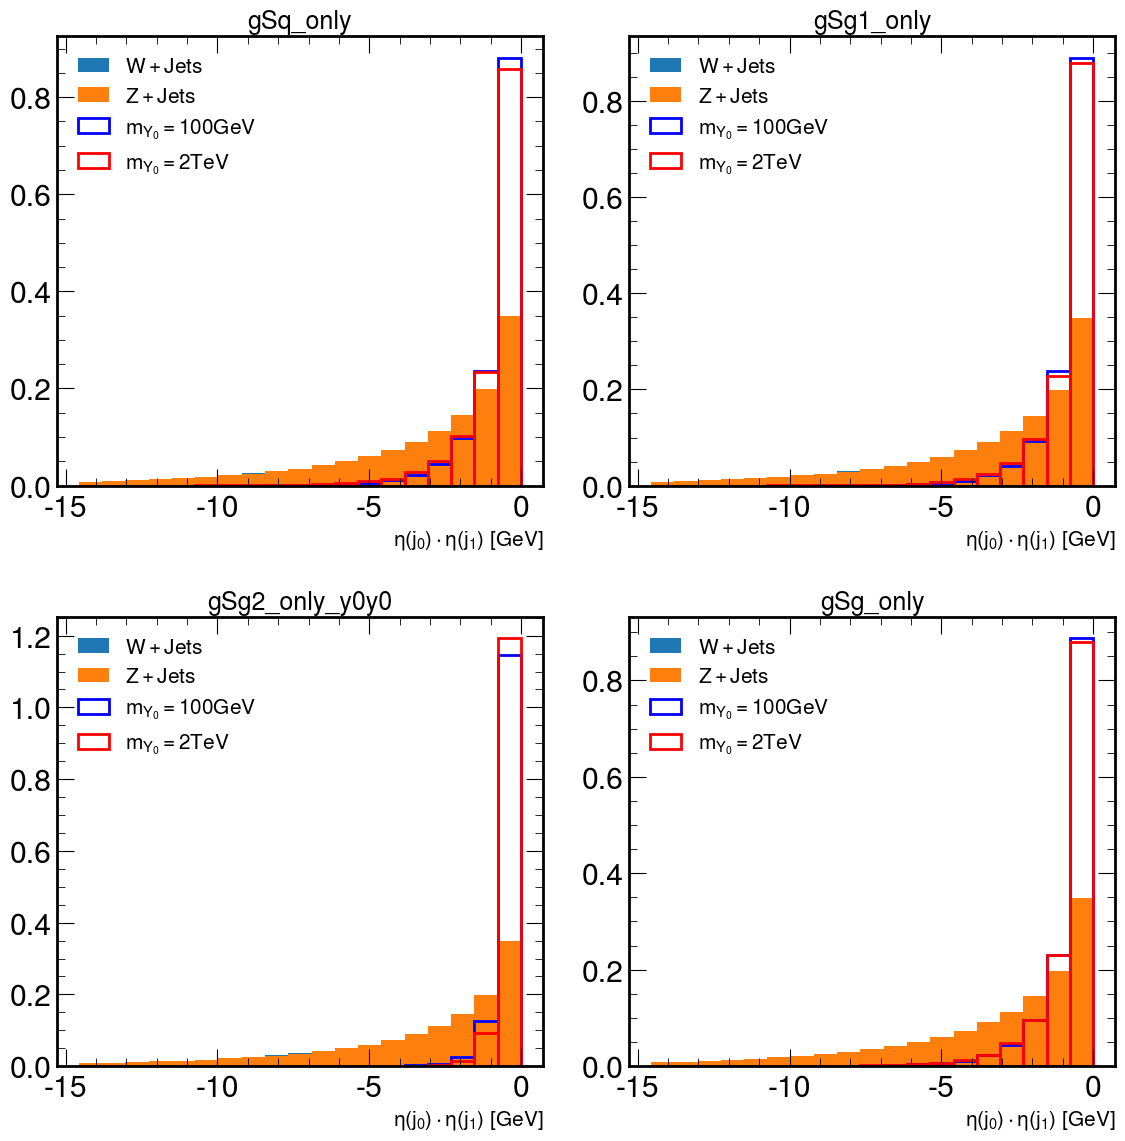

In [14]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Rapidity_prod'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$ [GeV]",fontsize=15)


fig.tight_layout()
plt.show()


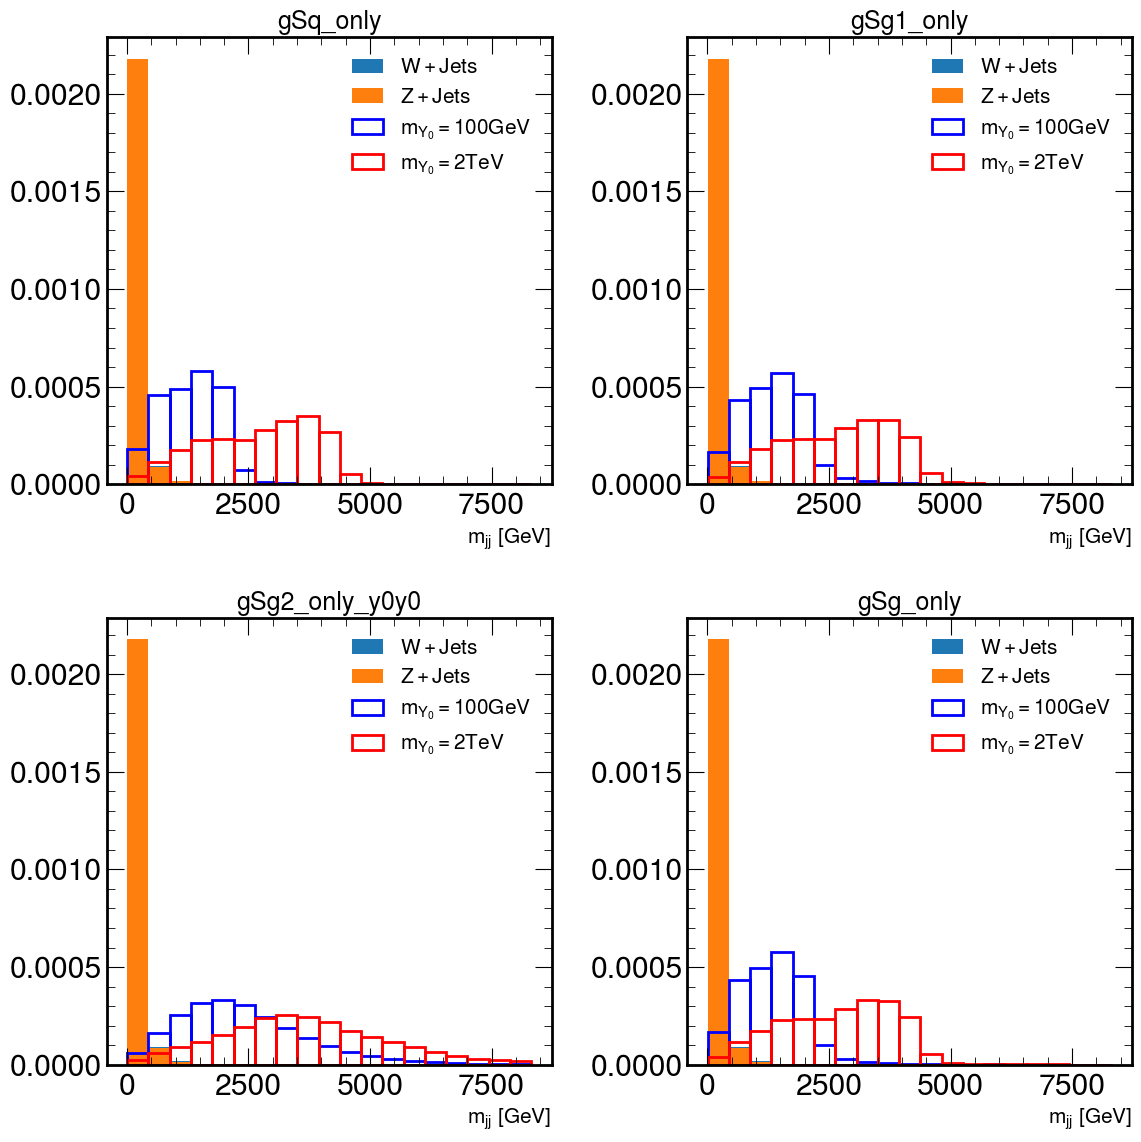

In [15]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Inv_mass'
nBins = 20
#
#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$m_{jj}$ [GeV]",fontsize=15)


fig.tight_layout()
plt.show()


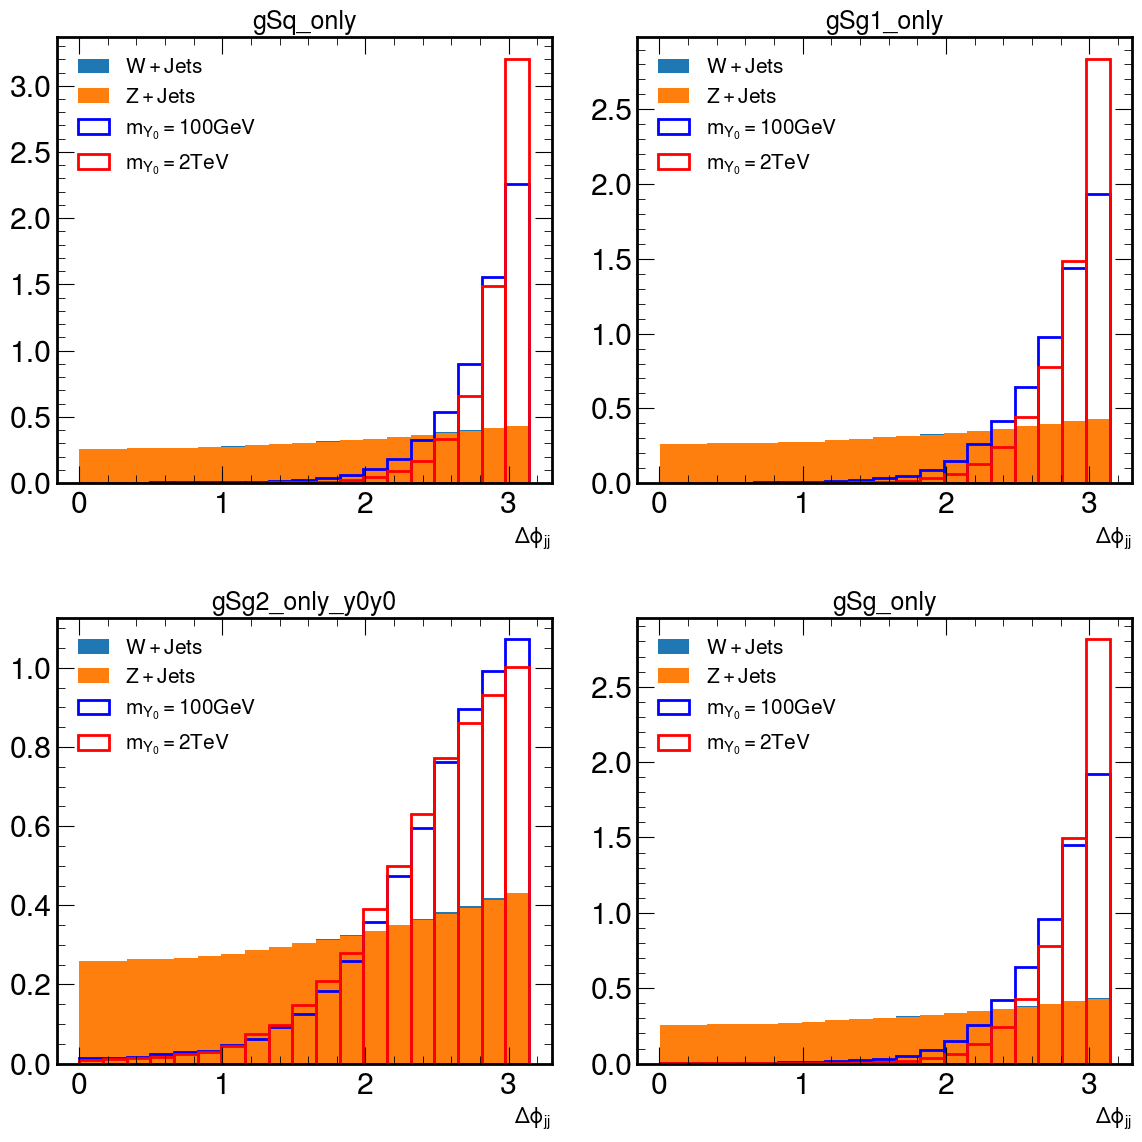

In [19]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Delta_phi'
nBins = 20
#
#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\phi_{jj}$",fontsize=15)


fig.tight_layout()
plt.show()


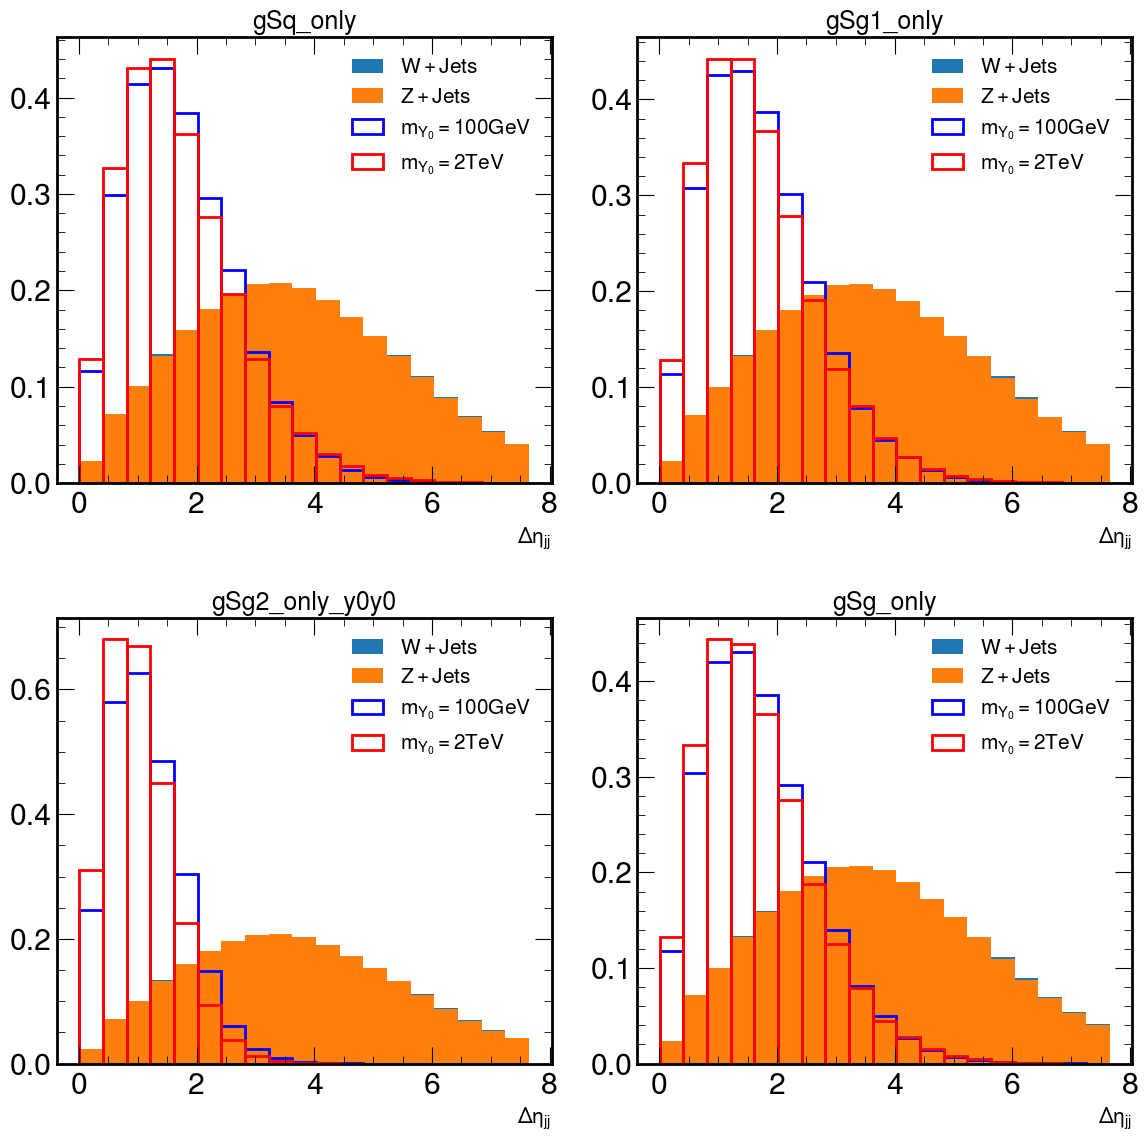

In [20]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Delta_rapidity'
nBins = 20
#
#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\eta_{jj}$",fontsize=15)


fig.tight_layout()
plt.show()


# Significance

Weights

$$W = \frac{N_{fisicos}}{N_{MG+Pythia}}$$

In [21]:
Weights = pd.read_csv("BGweigths.csv").to_dict()
# Luminosity to normalize
lum = 1 # fb-1

for i in cases:
    Weights[i] = []
    for j in range(2):
        Weights[i].append(CSs[i][j]*1000*lum/data[i][j].shape[0])

In [22]:
Weights['WpJets'] = Weights['WpJets'][0]
Weights['ZpJets'] = Weights['ZpJets'][0]
Weights.pop('Unnamed: 0')

{0: 0}

In [23]:
Weights

{'WpJets': 12.901682938859402,
 'ZpJets': 3.706521439496522,
 'gSq_only': [0.0020464126386444564, 0.001593346186325903],
 'gSg1_only': [0.883384668035592, 0.11642425561116039],
 'gSg2_only_y0y0': [0.002048131080389145, 0.0019374963671943116],
 'gSg_only': [0.8797848039111035, 0.11629614794044996]}

### Cut in $p_{T}(j_{0})$

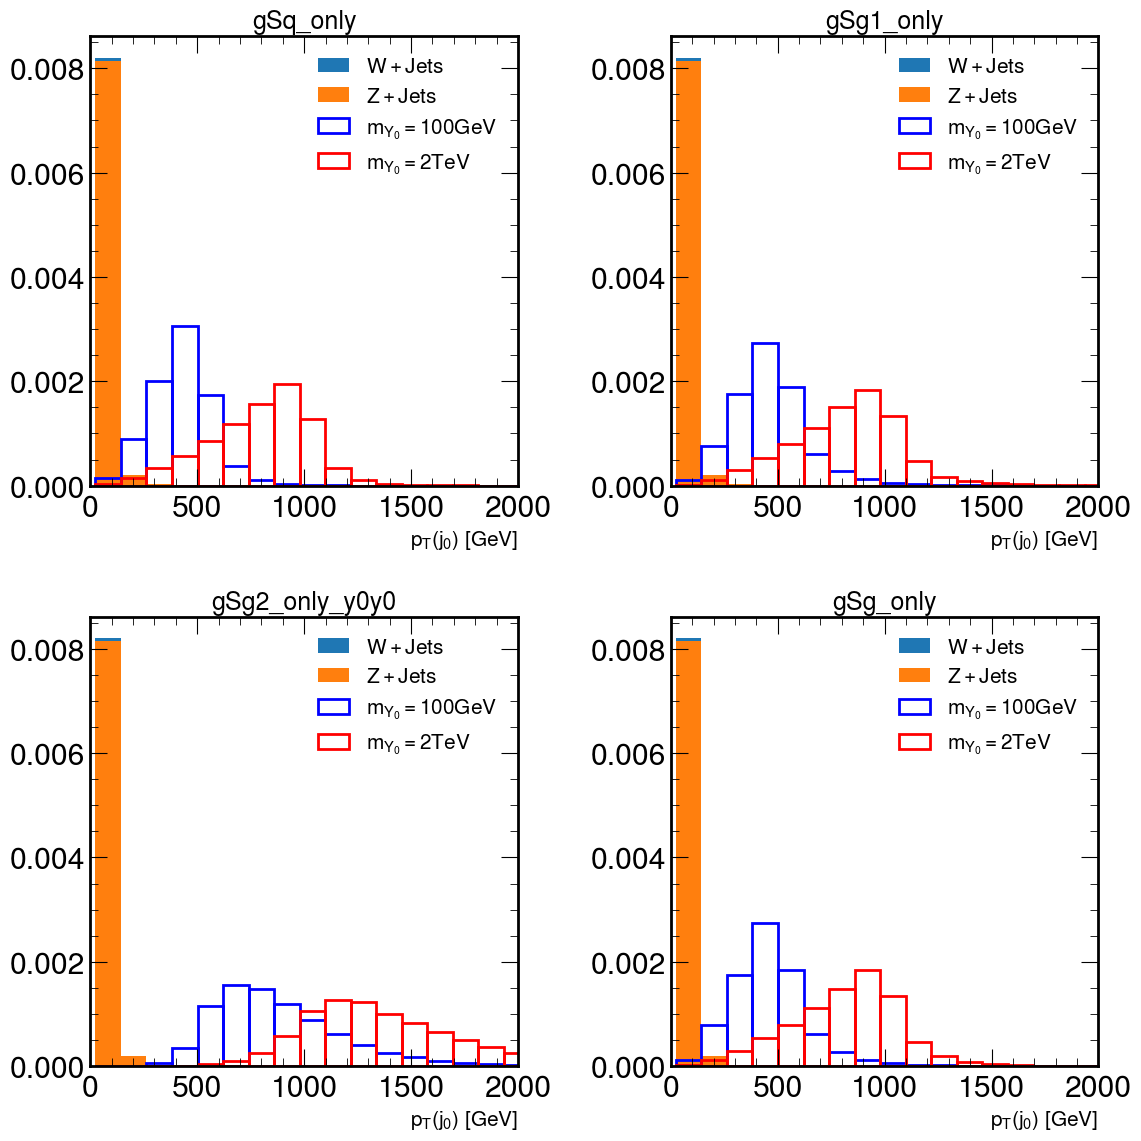

In [24]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'jet_pt0'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$p_{T}{(j_{0})}$ [GeV]",fontsize=15)
        ax[i,j].set_xlim(0,2000)


fig.tight_layout()
plt.show()


In [25]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt0', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

/home/juan/Documents/GitHub/VBFDM_EAFIT/funcs.py:342: RuntimeWarning: invalid value encountered in scalar divide
  Z[i][j][k] = S / np.sqrt(S + B)


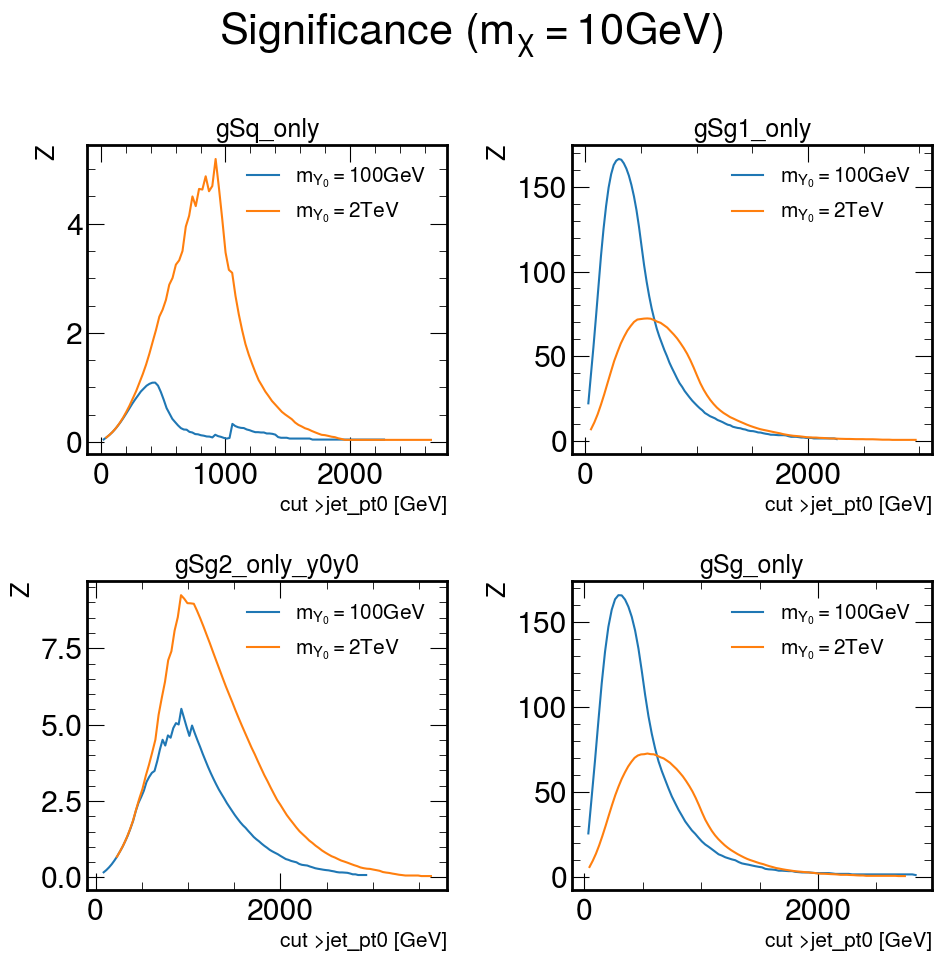

In [26]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

Acotamos el rango de busqueda

In [27]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt0', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']],
                                 set_lims=True, lims=(0,1500), size=500)

In [28]:
cuts = get_cuts(cases, Z, pt_values, "jet_pt0", "GeV", ["my0=100GeV", "my0=2TeV"], printResults=True)

case : gSq_only
	mass point: my0=100GeV
		max significance: 1.1077880812691645
		cut: jet_pt0 > 426.241GeV
	mass point: my0=2TeV
		max significance: 5.3671593634604
		cut: jet_pt0 > 911.064GeV
case : gSg1_only
	mass point: my0=100GeV
		max significance: 166.78472468387835
		cut: jet_pt0 > 306.029GeV
	mass point: my0=2TeV
		max significance: 72.43603524868362
		cut: jet_pt0 > 537.088GeV
case : gSg2_only_y0y0
	mass point: my0=100GeV
		max significance: 5.6970314947041345
		cut: jet_pt0 > 911.22GeV
	mass point: my0=2TeV
		max significance: 9.273158204631493
		cut: jet_pt0 > 912.613GeV
case : gSg_only
	mass point: my0=100GeV
		max significance: 166.10746636225386
		cut: jet_pt0 > 307.783GeV
	mass point: my0=2TeV
		max significance: 72.51109945812638
		cut: jet_pt0 > 552.127GeV


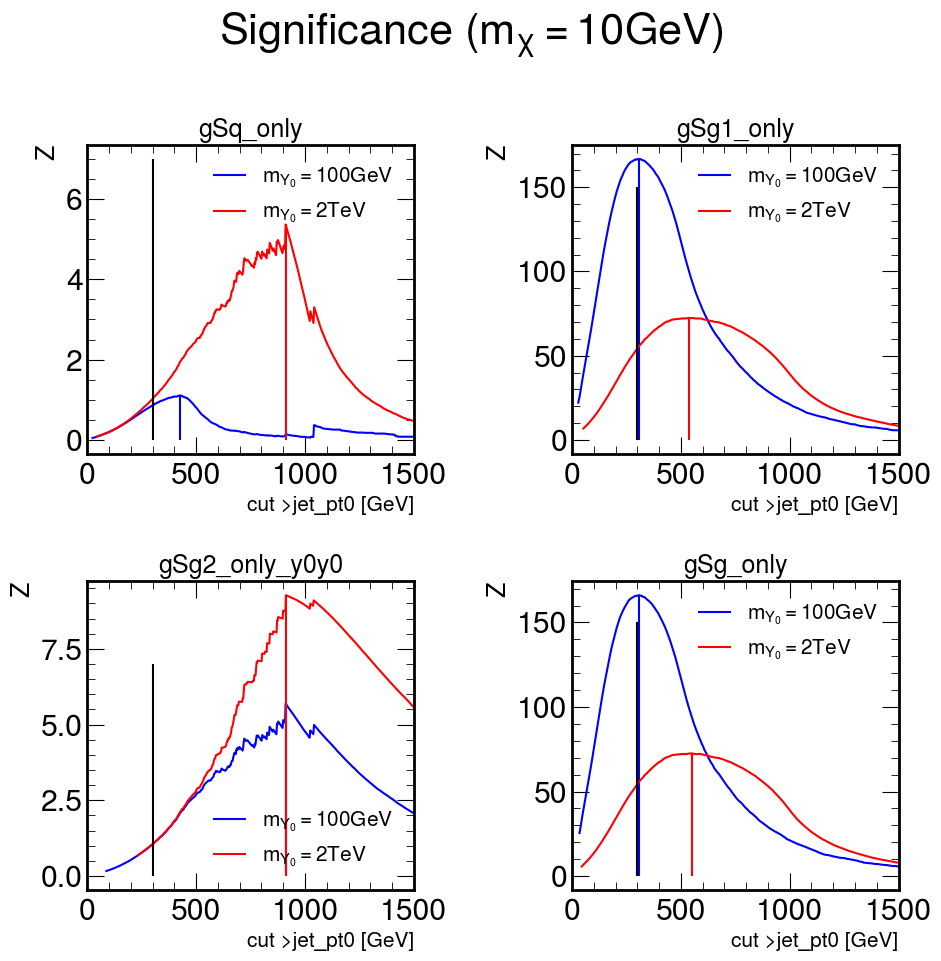

In [29]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i]),color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i]),color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i]),color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i]),color=colors[i])

ax[0,0].vlines(300, ymin=0, ymax=7, color='black')
ax[0,1].vlines(300, ymin=0, ymax=150, color='black')
ax[1,0].vlines(300, ymin=0, ymax=7, color='black')
ax[1,1].vlines(300, ymin=0, ymax=150, color='black')

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt0 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1500)

fig.tight_layout()
plt.show()

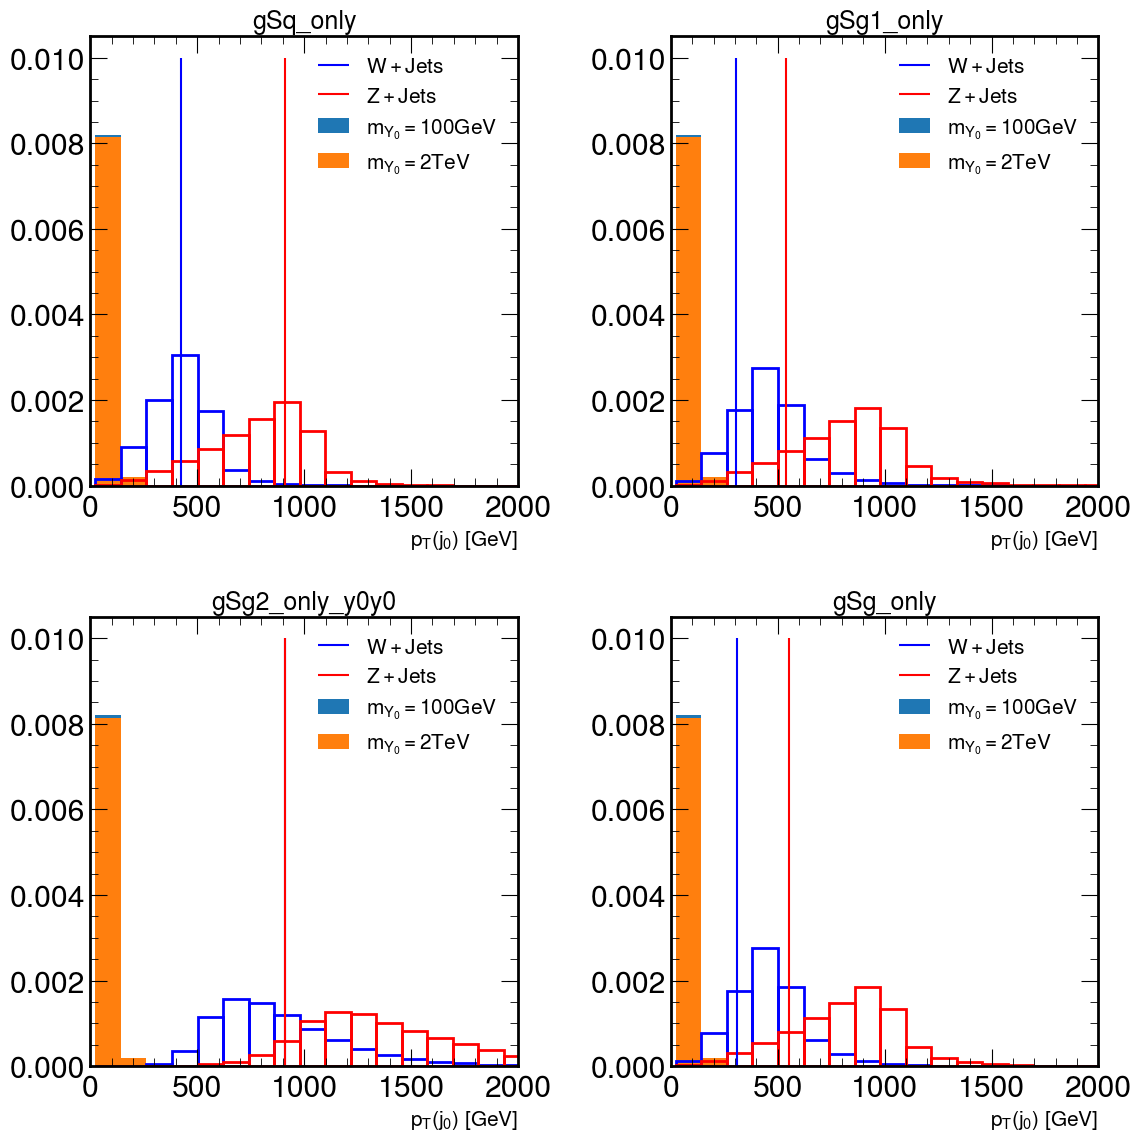

In [30]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'jet_pt0'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=0.01,color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$p_{T}{(j_{0})}$ [GeV]",fontsize=15)
        ax[i,j].set_xlim(0,2000)


fig.tight_layout()
plt.show()


Cut in 200GeV

In [31]:
cut_data = {}
dataWpJ_cut = {}
dataZpJ_cut = {}
for i in cases:
    cut_data[i] = []
    dataWpJ_cut[i] = []
    dataZpJ_cut[i] = []
    for j in range(2):
        #cut_data[i].append(data[i][j][data[i][j]['jet_pt0'] > cuts[i][j]].copy())
        #dataWpJ_cut[i].append(data_WpJ[data_WpJ['jet_pt0'] > cuts[i][j]].copy())
        #dataZpJ_cut[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > cuts[i][j]].copy())
        cut_data[i].append(data[i][j][data[i][j]['jet_pt0'] > 200].copy()) # jet_pt0 > 300GeV
        dataWpJ_cut[i].append(data_WpJ[data_WpJ['jet_pt0'] > 200].copy()) # jet_pt0 > 300GeV
        dataZpJ_cut[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > 200].copy()) # jet_pt0 > 300GeV

In [32]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])
print("\tCut")
print("Modelos: ",[[cut_data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets: ",[[dataWpJ_cut[i][j].shape[0] for j in range(2)] for i in cases])
print("ZpJets: ",[[dataZpJ_cut[i][j].shape[0] for j in range(2)] for i in cases])
print("\nOrden: ","gSg_only", "gSg1_only", "gSg2_only_y0y0", "gSq_only")

Número de Eventos para cada caso:
	Original
Modelos:  [[48866, 62761], [46752, 59747], [48825, 51613], [46841, 59916]]
WpJets + ZpJets:  [981327, 964557]
	Cut
Modelos:  [[46222, 62216], [44748, 59350], [48820, 51613], [44663, 59524]]
WpJets:  [[2020, 2020], [2020, 2020], [2020, 2020], [2020, 2020]]
ZpJets:  [[2378, 2378], [2378, 2378], [2378, 2378], [2378, 2378]]

Orden:  gSg_only gSg1_only gSg2_only_y0y0 gSq_only


Make cut

In [33]:
for i in cases:
    for j in range(2):
        data[i][j] = data[i][j].query('jet_pt0 > 200')

data_WpJ = data_WpJ.query('jet_pt0 > 200')
data_ZpJ = data_ZpJ.query('jet_pt0 > 200')

In [34]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])

Número de Eventos para cada caso:
	Original
Modelos:  [[46222, 62216], [44748, 59350], [48820, 51613], [44663, 59524]]
WpJets + ZpJets:  [2020, 2378]


### Cut in $p_{T}{(j_{1})}$

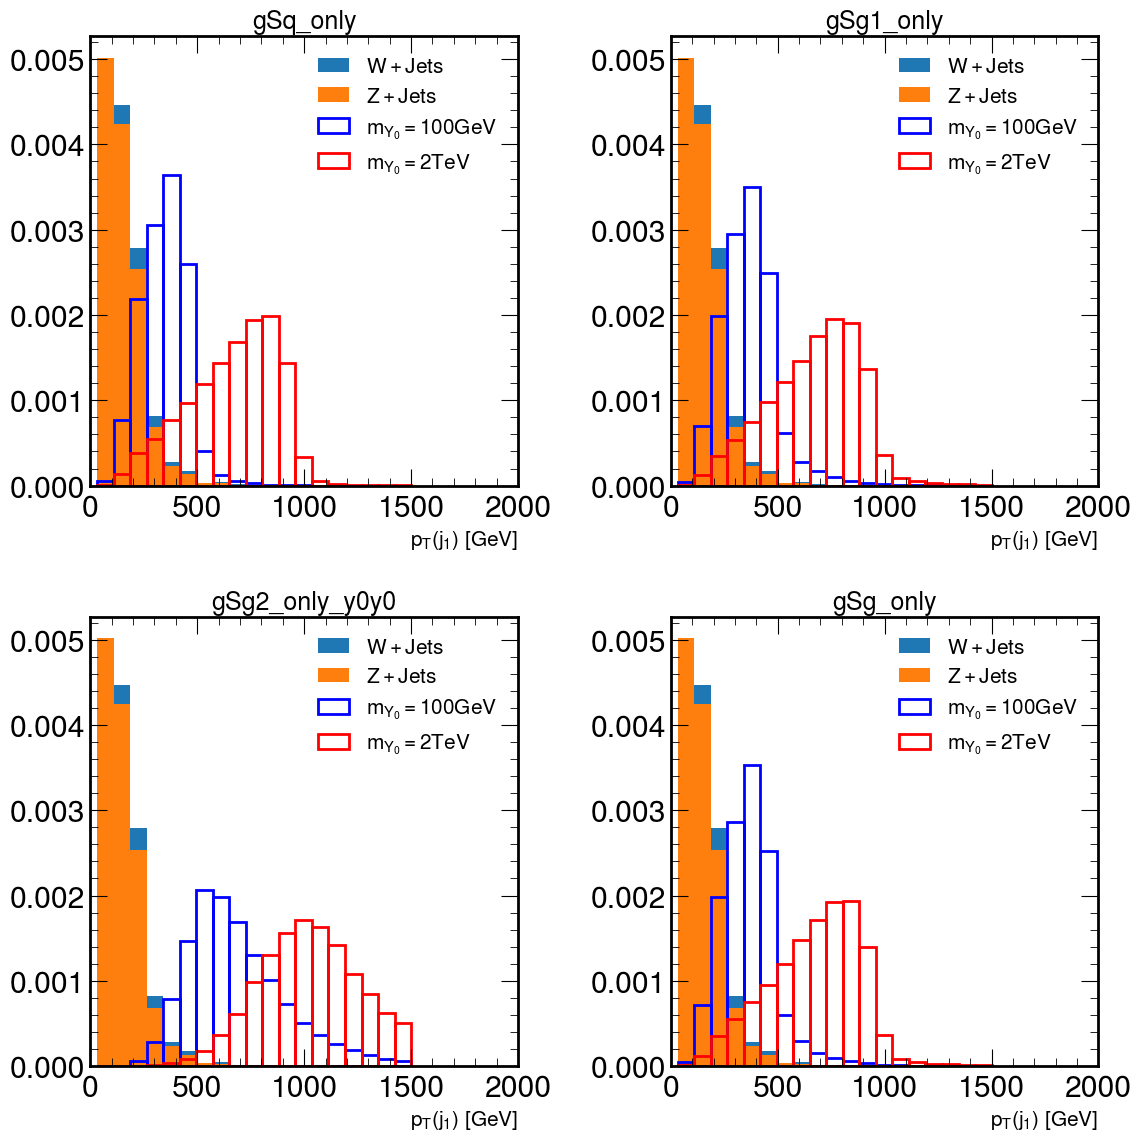

In [35]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'jet_pt1'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$p_{T}{(j_{1})}$ [GeV]",fontsize=15)
        ax[i,j].set_xlim(0,2000)


fig.tight_layout()
plt.show()


In [36]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt1', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

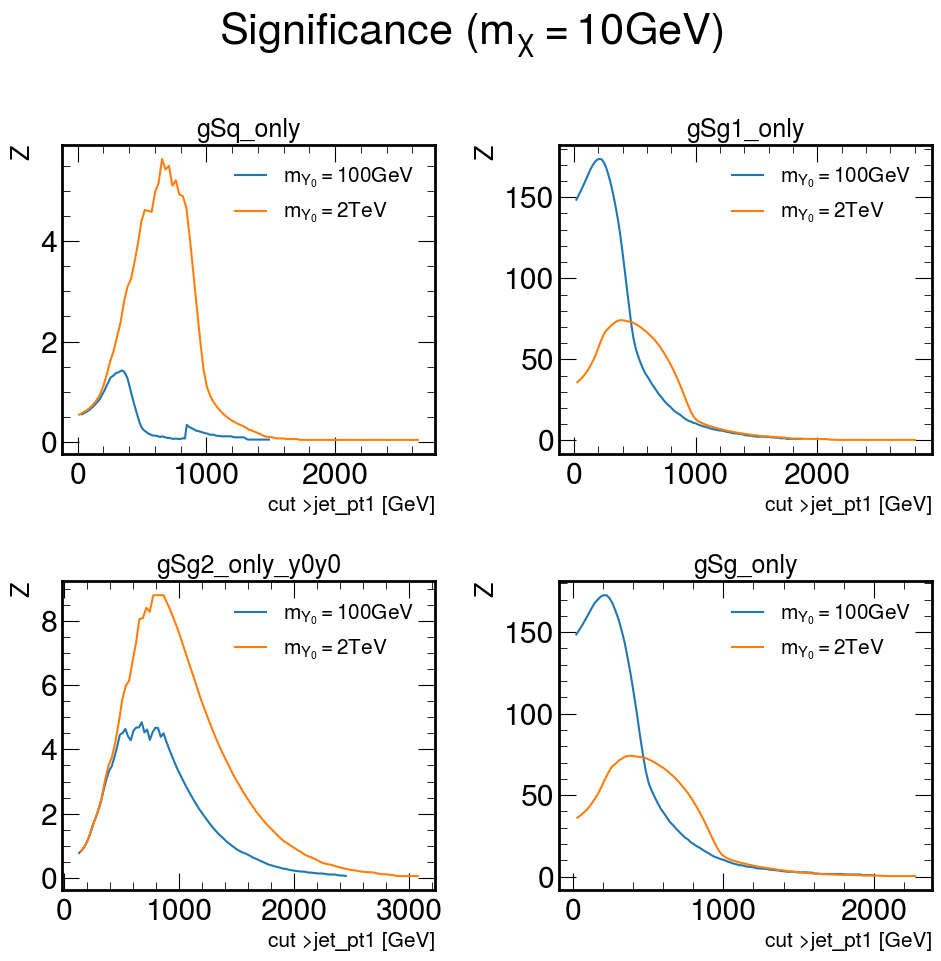

In [37]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt1 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

In [38]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='jet_pt1', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']],
                                 set_lims=True, lims=(0,1000), size=500)

In [39]:
cuts = get_cuts(cases, Z, pt_values, "jet_pt1", "GeV", ["my0=100GeV", "my0=2TeV"], printResults=True)

case : gSq_only
	mass point: my0=100GeV
		max significance: 1.4341604396899867
		cut: jet_pt1 > 348.155GeV
	mass point: my0=2TeV
		max significance: 5.686868033323833
		cut: jet_pt1 > 651.289GeV
case : gSg1_only
	mass point: my0=100GeV
		max significance: 173.8777478899516
		cut: jet_pt1 > 218.691GeV
	mass point: my0=2TeV
		max significance: 74.33886959333621
		cut: jet_pt1 > 384.607GeV
case : gSg2_only_y0y0
	mass point: my0=100GeV
		max significance: 5.064519419905861
		cut: jet_pt1 > 651.399GeV
	mass point: my0=2TeV
		max significance: 8.929969754665013
		cut: jet_pt1 > 811.95GeV
case : gSg_only
	mass point: my0=100GeV
		max significance: 173.05918918283743
		cut: jet_pt1 > 218.078GeV
	mass point: my0=2TeV
		max significance: 74.28983983954446
		cut: jet_pt1 > 384.534GeV


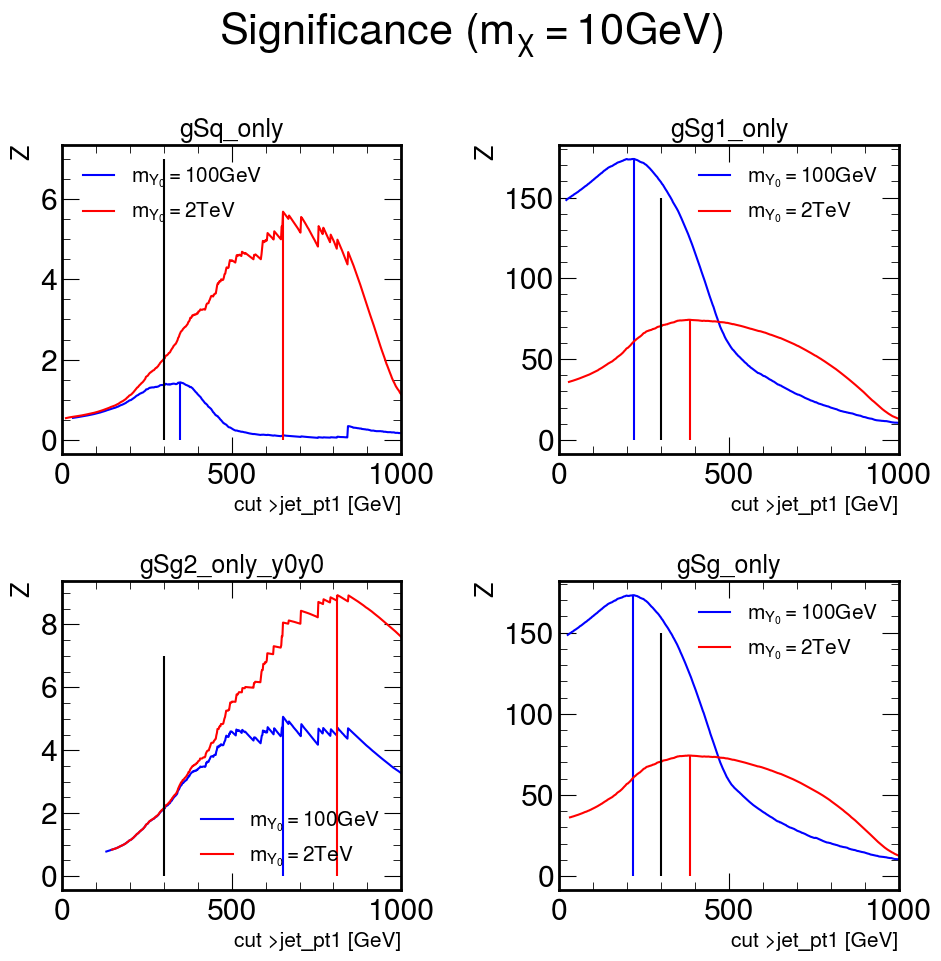

In [40]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

colors = ["b","r"]
labels = [r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"]

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i],color=colors[i], label=labels[i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i],color=colors[i], label=labels[i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i],color=colors[i], label=labels[i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i],color=colors[i], label=labels[i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=max(Z[cases[0]][i]),color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=max(Z[cases[1]][i]),color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=max(Z[cases[2]][i]),color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=max(Z[cases[3]][i]),color=colors[i])

ax[0,0].vlines(300, ymin=0, ymax=7, color='black')
ax[0,1].vlines(300, ymin=0, ymax=150, color='black')
ax[1,0].vlines(300, ymin=0, ymax=7, color='black')
ax[1,1].vlines(300, ymin=0, ymax=150, color='black')

for i in range(2):
    for j in range(2):
        ax[i,j].legend(fontsize=15)
        ax[i,j].set_xlabel("cut >jet_pt1 [GeV]",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        ax[i,j].set_xlim(0,1000)

fig.tight_layout()
plt.show()

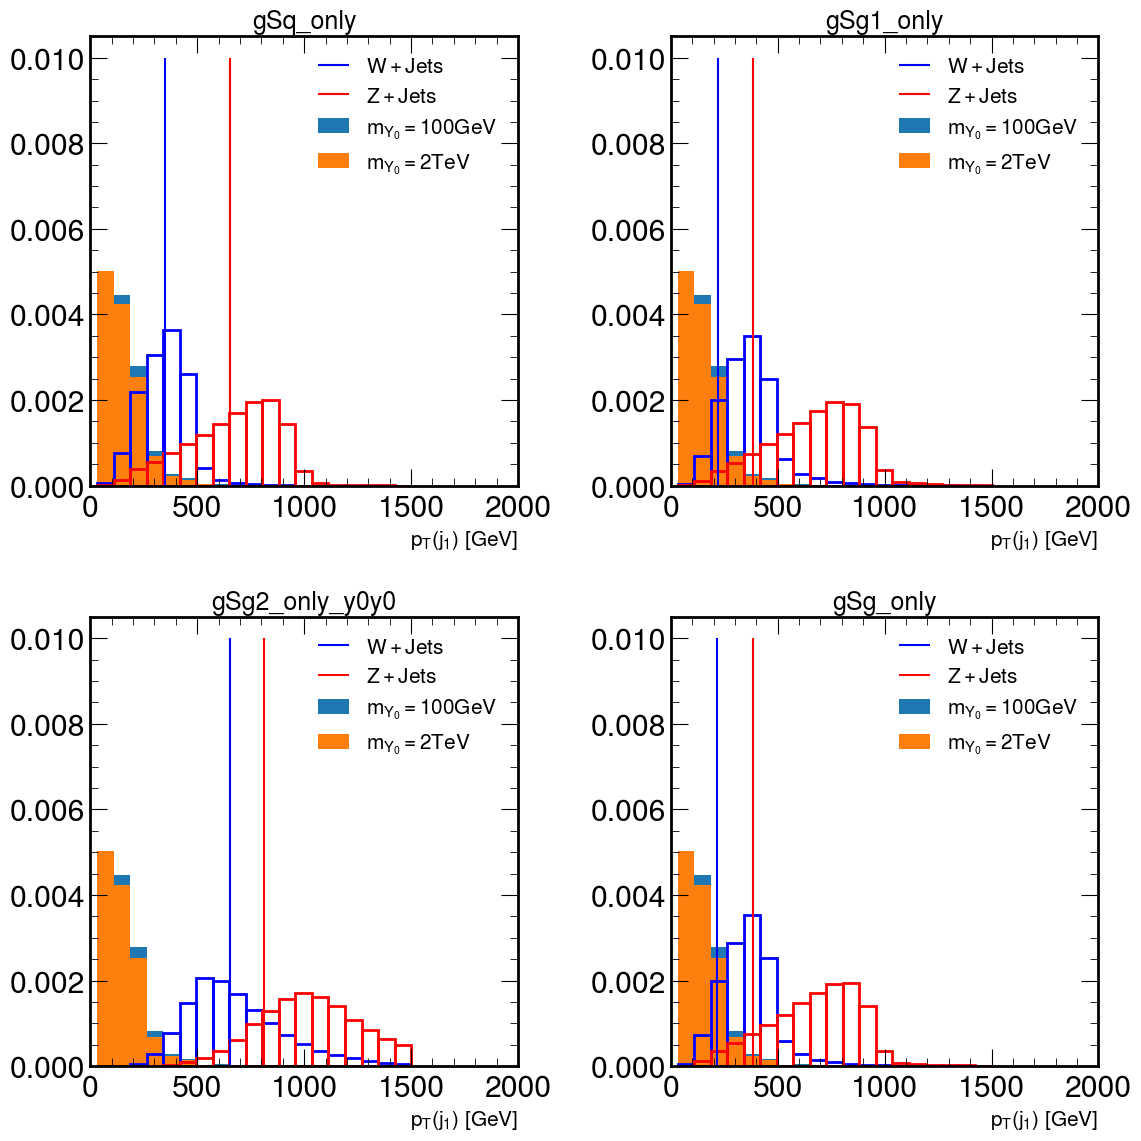

In [41]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'jet_pt1'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)
    ax[0,0].vlines(cuts[cases[0]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[0,1].vlines(cuts[cases[1]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,0].vlines(cuts[cases[2]][i], ymin=0, ymax=0.01,color=colors[i])
    ax[1,1].vlines(cuts[cases[3]][i], ymin=0, ymax=0.01,color=colors[i])

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$p_{T}{(j_{1})}$ [GeV]",fontsize=15)
        ax[i,j].set_xlim(0,2000)


fig.tight_layout()
plt.show()

Make cut in 300GeV

In [42]:
cut_data = {}
dataWpJ_cut = {}
dataZpJ_cut = {}
for i in cases:
    cut_data[i] = []
    dataWpJ_cut[i] = []
    dataZpJ_cut[i] = []
    for j in range(2):
        cut_data[i].append(data[i][j][data[i][j]['jet_pt0'] > cuts[i][j]].copy())
        dataWpJ_cut[i].append(data_WpJ[data_WpJ['jet_pt0'] > cuts[i][j]].copy())
        dataZpJ_cut[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > cuts[i][j]].copy())
        #cut_data2[i].append(data[i][j][data[i][j]['jet_pt0'] > 300].copy()) # jet_pt0 > 300GeV
        #dataWpJ_cut2[i].append(data_WpJ[data_WpJ['jet_pt0'] > 300].copy()) # jet_pt0 > 300GeV
        #dataZpJ_cut2[i].append(data_ZpJ[data_ZpJ['jet_pt0'] > 300].copy()) # jet_pt0 > 300GeV

In [43]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])
print("\tCut")
print("Modelos: ",[[cut_data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets: ",[[dataWpJ_cut[i][j].shape[0] for j in range(2)] for i in cases])
print("ZpJets: ",[[dataZpJ_cut[i][j].shape[0] for j in range(2)] for i in cases])
print("\nOrden: ","gSg_only", "gSg1_only", "gSg2_only_y0y0", "gSq_only")

Número de Eventos para cada caso:
	Original
Modelos:  [[46222, 62216], [44748, 59350], [48820, 51613], [44663, 59524]]
WpJets + ZpJets:  [2020, 2378]
	Cut
Modelos:  [[35057, 46283], [44084, 56555], [37477, 49987], [44014, 56750]]
WpJets:  [[303, 24], [1489, 206], [24, 4], [1511, 206]]
ZpJets:  [[344, 17], [1776, 230], [17, 7], [1791, 230]]

Orden:  gSg_only gSg1_only gSg2_only_y0y0 gSq_only


In [44]:
for i in cases:
    for j in range(2):
        data[i][j] = data[i][j].query('jet_pt1 > 300')

data_WpJ = data_WpJ.query('jet_pt1 > 300')
data_ZpJ = data_ZpJ.query('jet_pt1 > 300')

In [45]:
print("Número de Eventos para cada caso:")
print("\tOriginal")
print("Modelos: ",[[data[i][j].shape[0] for j in range(2)] for i in cases])
print("WpJets + ZpJets: ",[data_WpJ.shape[0], data_ZpJ.shape[0]])

Número de Eventos para cada caso:
	Original
Modelos:  [[30775, 58477], [30913, 56104], [48264, 51591], [30902, 56235]]
WpJets + ZpJets:  [127, 111]


## Plot $p_{T}^{miss}$

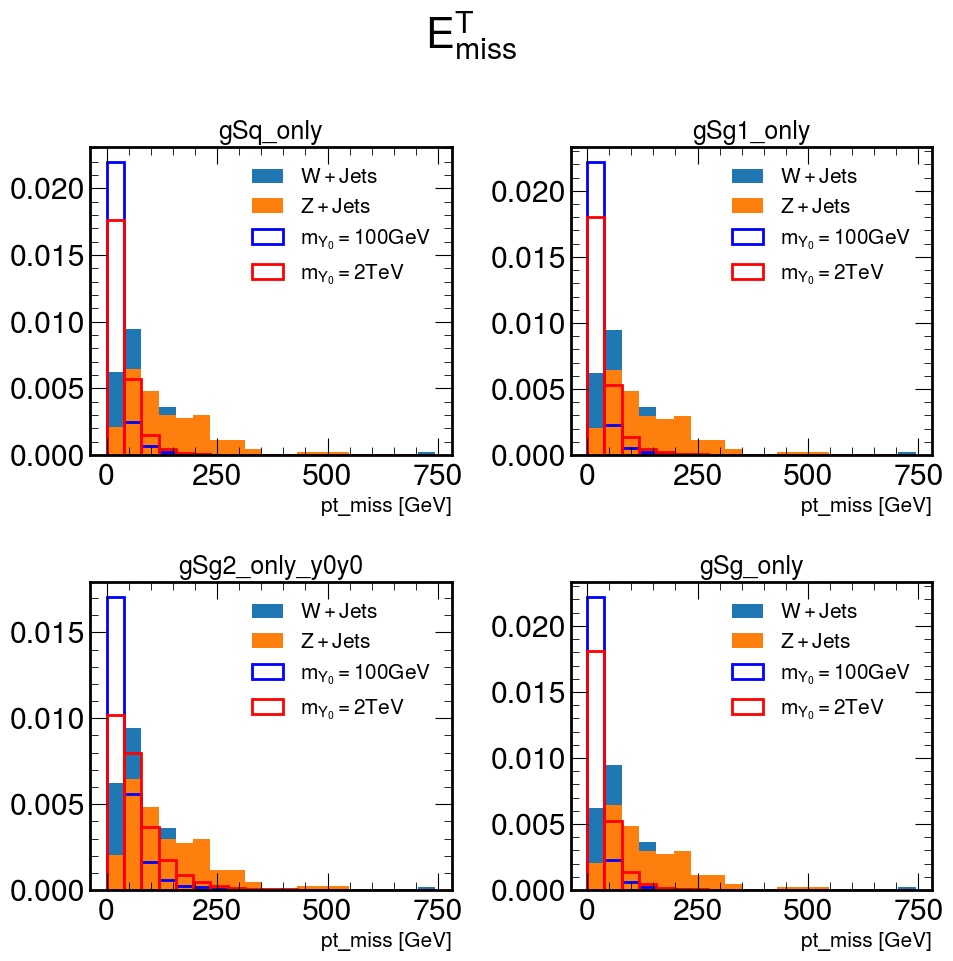

In [46]:
fig, ax = plt.subplots(2,2)
fig.suptitle(r"$E^{T}_{miss}$")

variable = 'missinget_met'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j]['missinget_met']),max(data[i][j]['missinget_met'])))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ['missinget_met']), max(data_WpJ['missinget_met']))
#rangos['ZpJets'] = np.linspace(min(data_ZpJ['missinget_met']), max(data_ZpJ['missinget_met']))

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ['missinget_met'], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ['missinget_met'], bins=rango, density=True)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i]['missinget_met'], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i]['missinget_met'], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i]['missinget_met'], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i]['missinget_met'], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel("pt_miss [GeV]",fontsize=15)

fig.tight_layout()
plt.show()


#### VBF variables

$\eta(j_{0}) \cdot \eta(j_{1})$

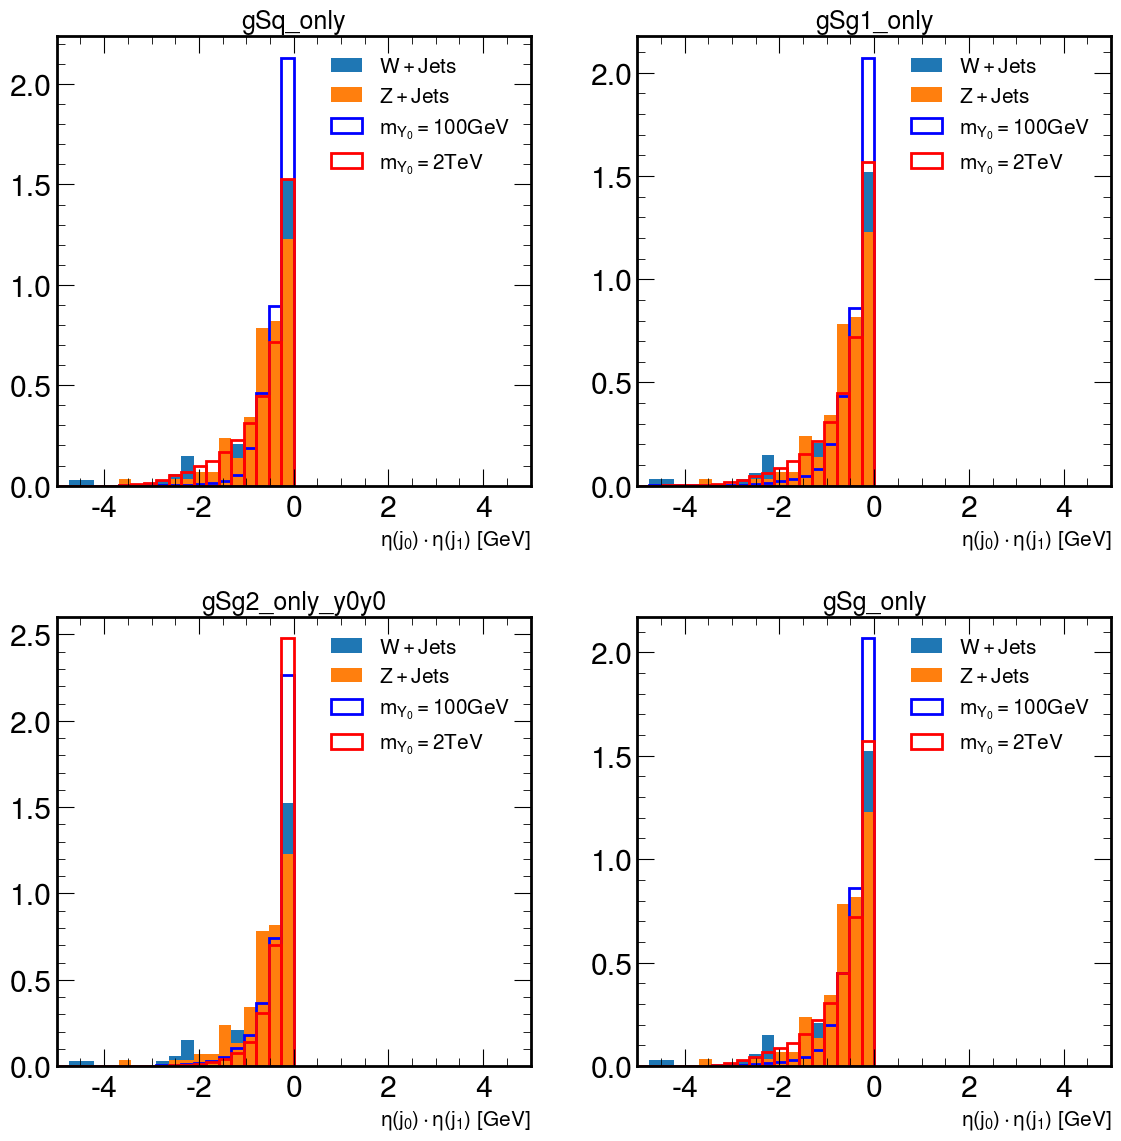

In [48]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Rapidity_prod'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)
rango = np.linspace(min(data[cases[0]][0][variable]),max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)
        #ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV",r"$W+Jets$",r"$Z+Jets$"],fontsize=15)
        ax[i,j].set_xlabel(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$ [GeV]",fontsize=15)
        ax[i,j].set_xlim(-5,5)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$ [GeV]",fontsize=15)


fig.tight_layout()
plt.show()


In [49]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Rapidity_prod', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']], cond='<')

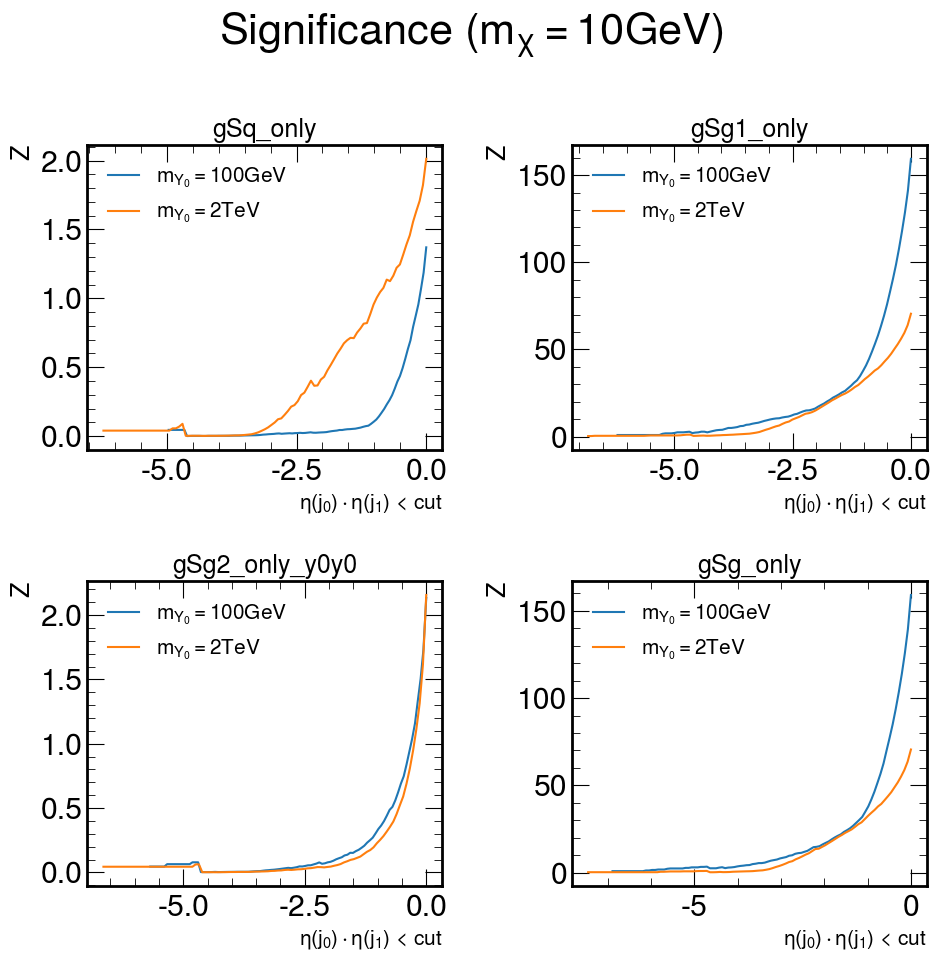

In [50]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\eta{(j_{0})}\cdot\eta{(j_{1})}$ < cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

### $\Delta\phi_{jj}$

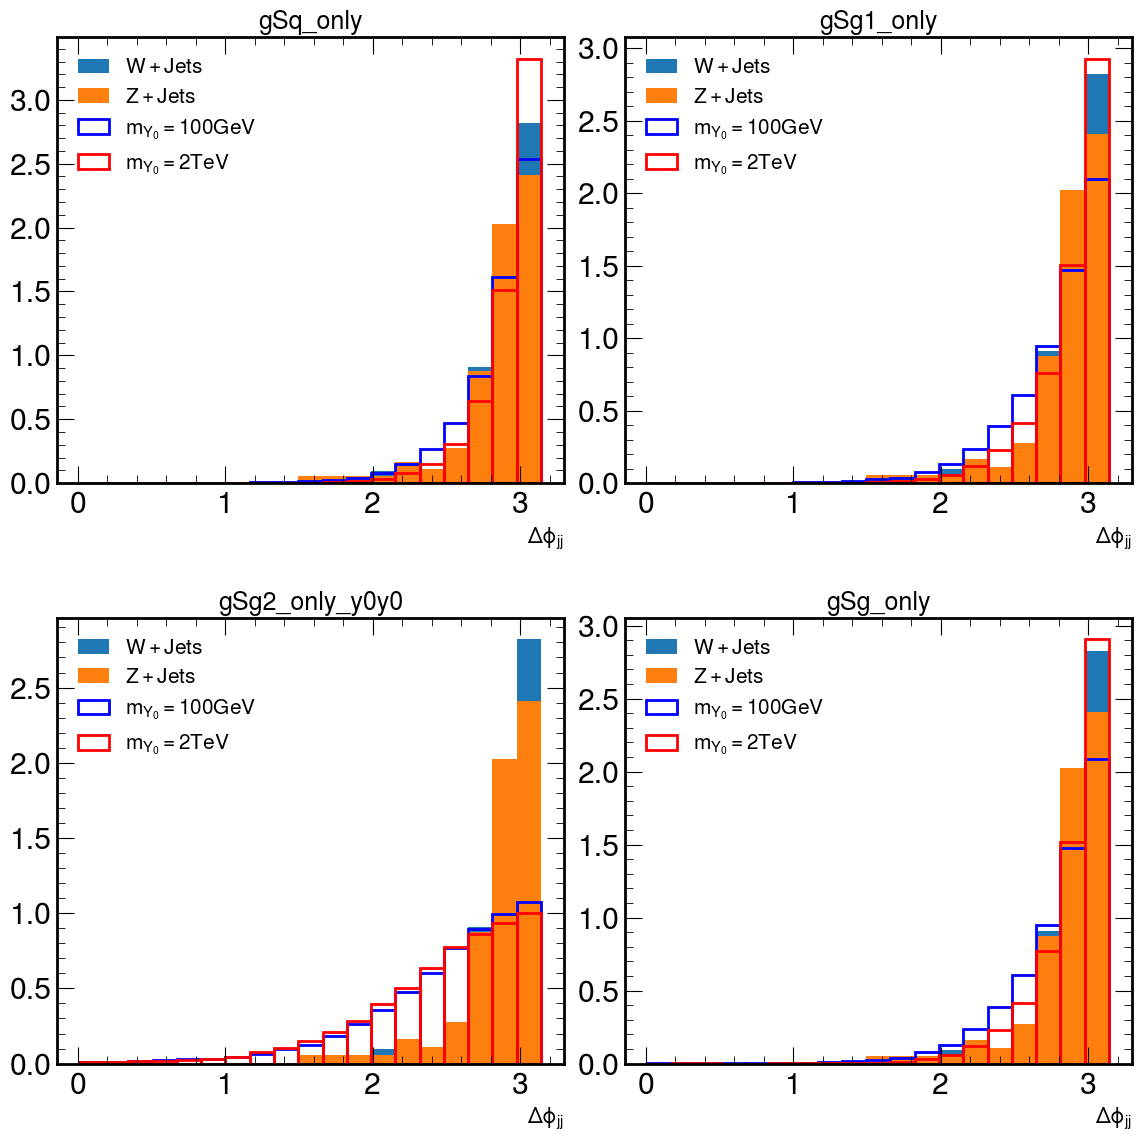

In [52]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Delta_phi'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)
        #ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV",r"$W+Jets$",r"$Z+Jets$"],fontsize=15)
        
        #ax[i,j].set_xlim(-5,5)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\phi_{jj}$",fontsize=15)


fig.tight_layout()
plt.show()


In [53]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Delta_phi', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

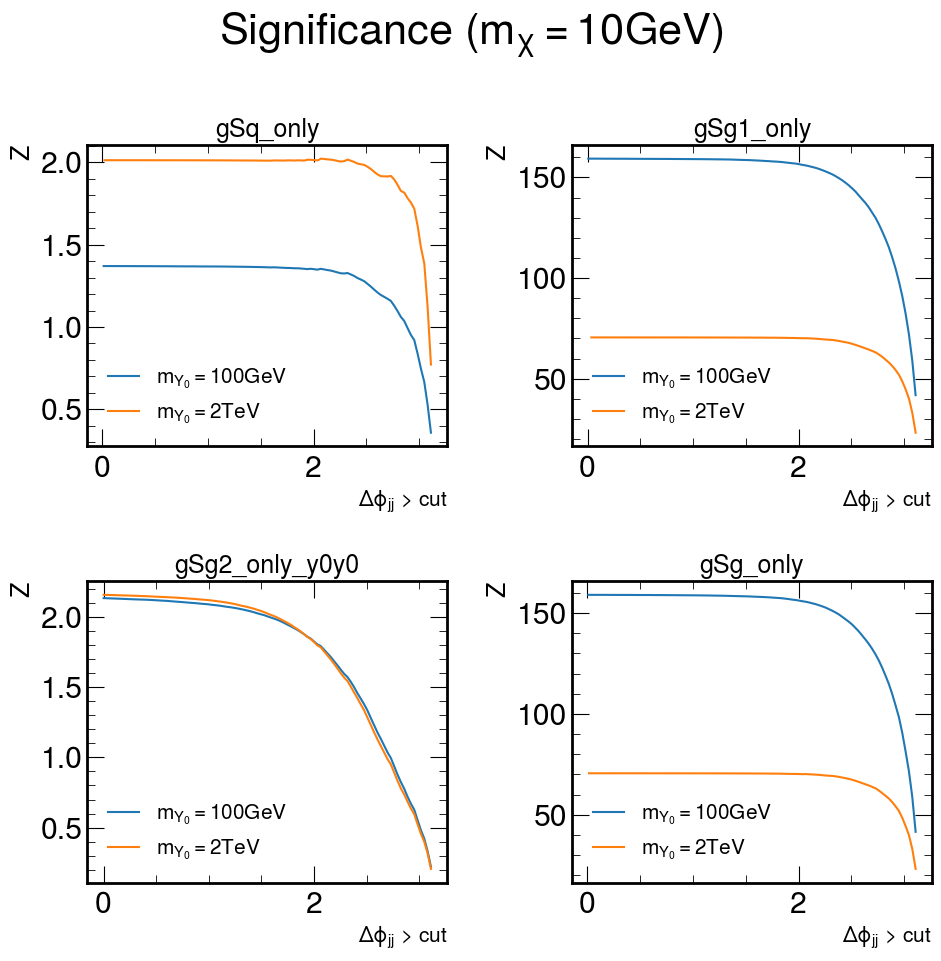

In [54]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\phi_{jj}$ > cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

### $m_{jj}$

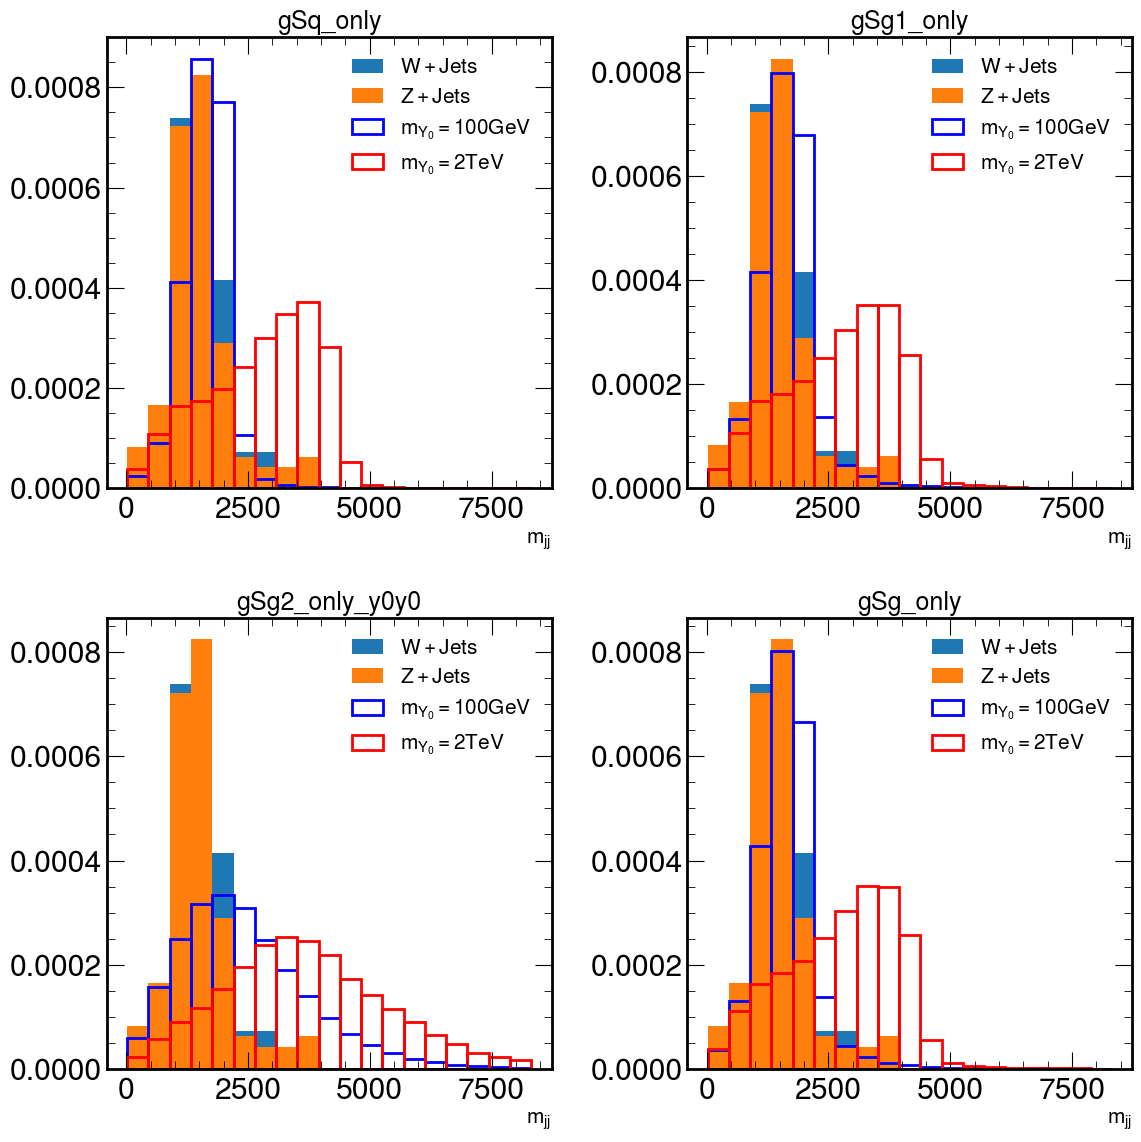

In [55]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Inv_mass'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)
        #ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV",r"$W+Jets$",r"$Z+Jets$"],fontsize=15)
        
        #ax[i,j].set_xlim(-5,5)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$m_{jj}$",fontsize=15)


fig.tight_layout()
plt.show()


In [56]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Inv_mass', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

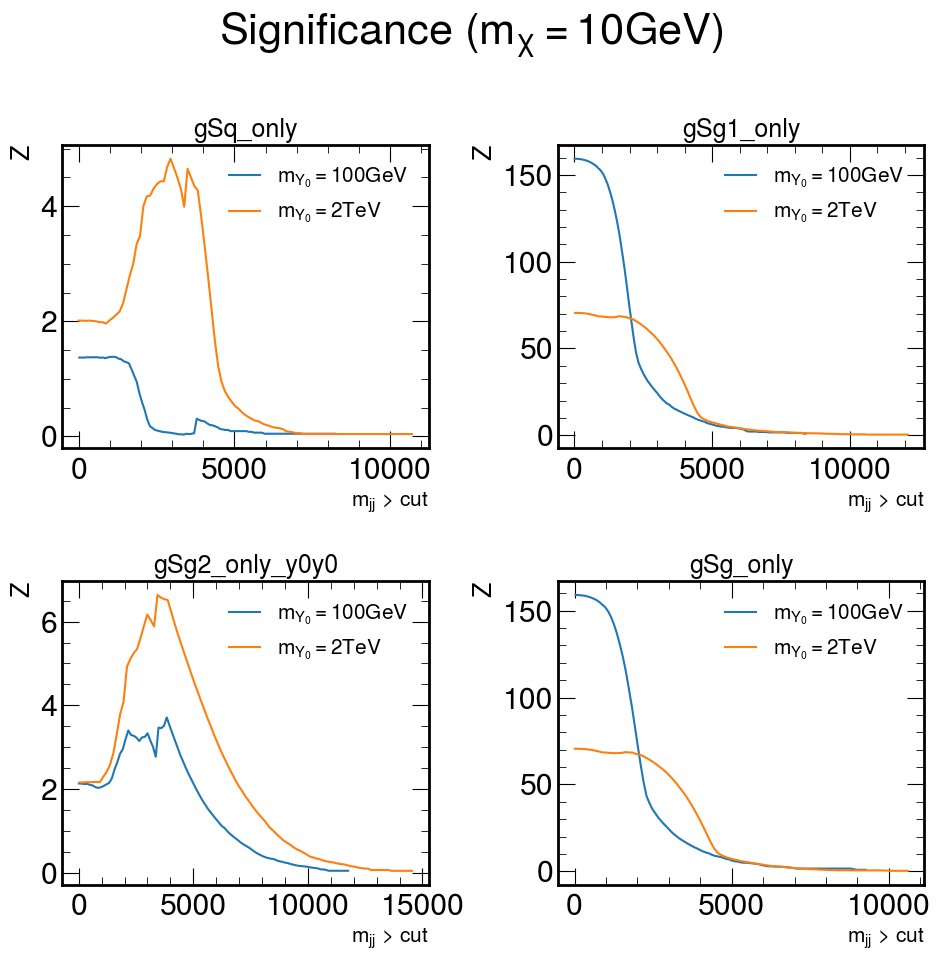

In [57]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$m_{jj}$ > cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()

### $\Delta \eta_{jj}$

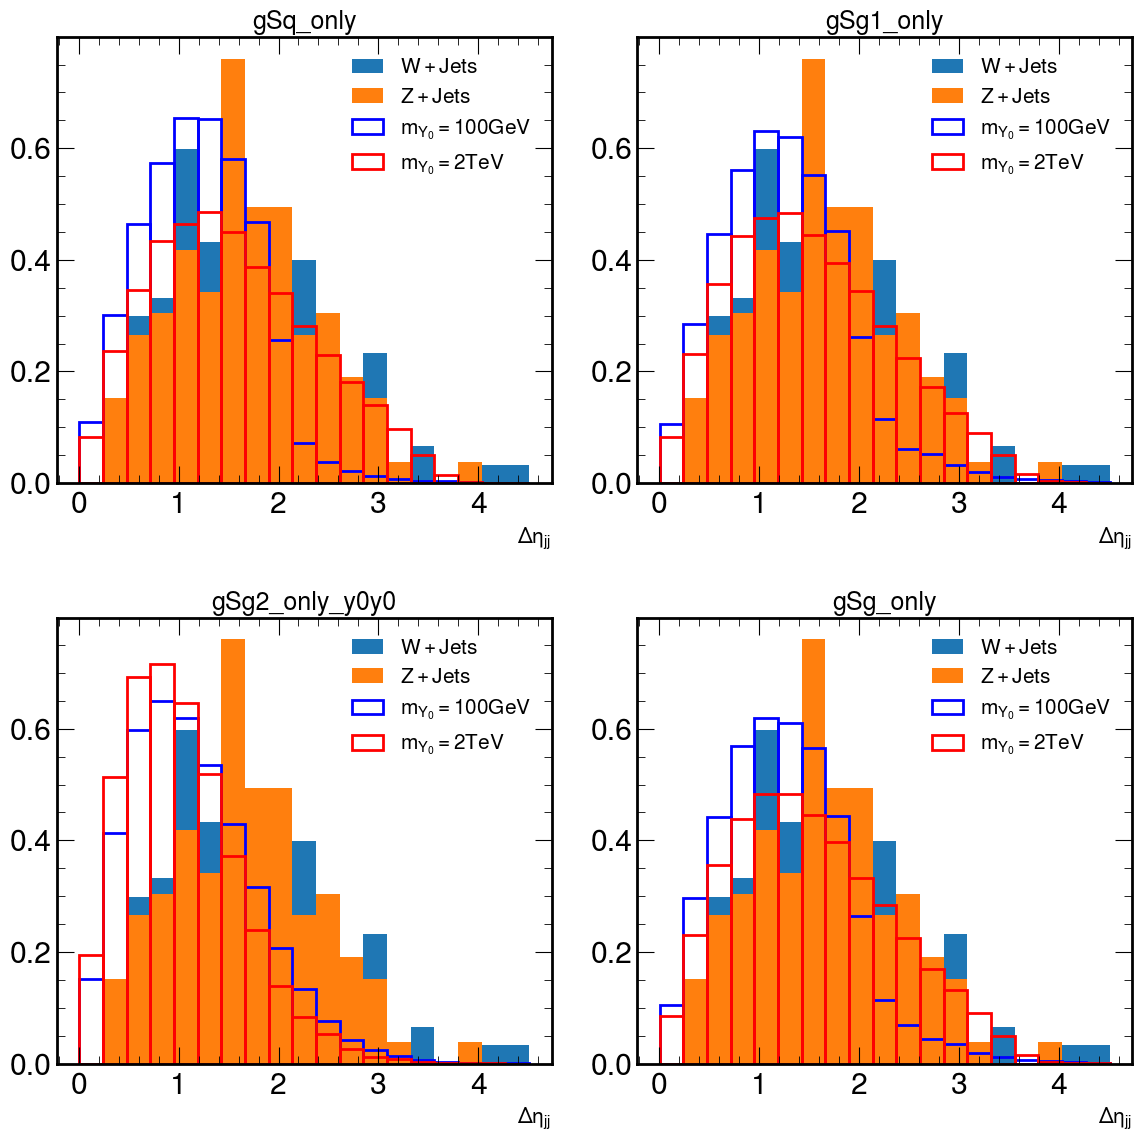

In [59]:
fig, ax = plt.subplots(2,2, figsize=(12,12))
#fig.suptitle(r"$\eta{(j_{1})}\cdot\eta{(j_{2})}$")

variable = 'Delta_rapidity'
nBins = 20

#rangos = {}
#for i in cases:
#    rangos[i] = []
#    for j in range(2):
#        rangos[i].append(np.linspace(min(data[i][j][variable]),max(data[i][j][variable]), nBins))
#
#rangos['WpJets'] = np.linspace(min(data_WpJ[variable]), max(data_WpJ[variable]), nBins)
#rangos['ZpJets'] = np.linspace(min(data_ZpJ[variable]), max(data_ZpJ[variable]), nBins)

rango = np.linspace(min(data[cases[0]][0][variable]), max(data[cases[0]][0][variable]), nBins)

colors = ['blue', 'red']

for i in range(2):
    for j in range(2):
        ax[i,j].hist(data_WpJ[variable], bins=rango, density=True)
        ax[i,j].hist(data_ZpJ[variable], bins=rango, density=True)
        #ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV",r"$W+Jets$",r"$Z+Jets$"],fontsize=15)
        
        #ax[i,j].set_xlim(-5,5)

for i in range(2):
    ax[0,0].hist(data[cases[0]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,1].hist(data[cases[1]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,0].hist(data[cases[2]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[1,1].hist(data[cases[3]][i][variable], bins=rango, density=True, color=colors[i], edgecolor=colors[i], fc='None', lw=2)
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$W+Jets$",r"$Z+Jets$", r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\eta_{jj}$",fontsize=15)


fig.tight_layout()
plt.show()

In [60]:
Z, pt_values = find_significance(cases, data, [data_WpJ, data_ZpJ],
                                 cut_var='Delta_rapidity', use_weights=True, SG_weights=Weights,
                                 BG_weights=[Weights['WpJets'], Weights['ZpJets']])

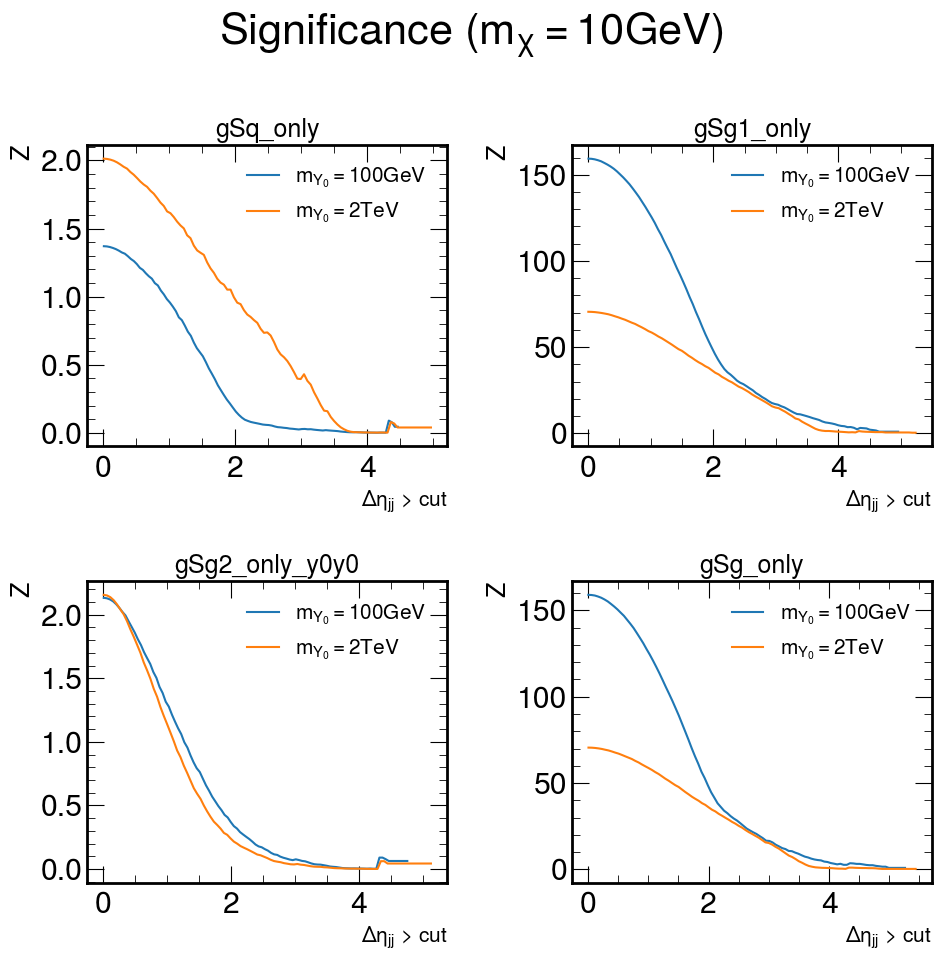

In [61]:
fig, ax = plt.subplots(2,2)

fig.suptitle(r"Significance ($m_{\chi} = 10$GeV)")

for i in range(2):
    ax[0,0].plot(pt_values[cases[0]][i], Z[cases[0]][i])
    ax[0,1].plot(pt_values[cases[1]][i], Z[cases[1]][i])
    ax[1,0].plot(pt_values[cases[2]][i], Z[cases[2]][i])
    ax[1,1].plot(pt_values[cases[3]][i], Z[cases[3]][i])
    ax[0,0].set_title(cases[0], fontsize=18)
    ax[0,1].set_title(cases[1], fontsize=18)
    ax[1,0].set_title(cases[2], fontsize=18)
    ax[1,1].set_title(cases[3], fontsize=18)

for i in range(2):
    for j in range(2):
        ax[i,j].legend([r"$m_{Y_{0}}=100$GeV",r"$m_{Y_{0}}=2$TeV"],fontsize=15)
        ax[i,j].set_xlabel(r"$\Delta\eta_{jj}$ > cut",fontsize=15)
        ax[i,j].set_ylabel("Z",fontsize=18)
        #ax[i,j].set_xlim(0,2000)

fig.tight_layout()
plt.show()